In [29]:
import snowflake.connector
import os 
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
load_dotenv("snowflake.env")

conn = snowflake.connector.connect(
    user=os.getenv("SNOWFLAKE_USER"),
    password=os.getenv("SNOWFLAKE_PASSWORD"),
    account=os.getenv("SNOWFLAKE_ACCOUNT"),
    database="IMDB_TOP_1000",
    schema="IMDB_DATA"
)

cur = conn.cursor()
cur.execute('select * from "movies"')

df = cur.fetch_pandas_all()

conn.close()

RGB Values: (0.20803, 0.718701, 0.472873)


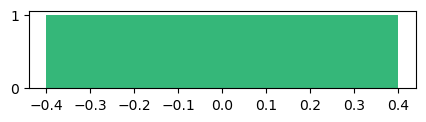

In [31]:
# Choose a color from Seaborn's "Viridis" palette for uniform use in all graphs that don't need a color palette due to their lack of hue.

viridis_palette = sns.color_palette('viridis', 5) 
print("RGB Values:", viridis_palette[3])
plt.figure(figsize=(5, 1))
plt.bar([0], [1], color=viridis_palette[3])
plt.show()

In [32]:
# How did the average runtime for a movie change over time?

average_runtime_year = df.groupby("Released_Year")["Runtime"].mean().reset_index()
average_runtime_year = average_runtime_year[average_runtime_year["Released_Year"] != 0]
average_runtime_year

,Released_Year,Runtime
1,1920,76.000000
2,1921,68.000000
3,1922,94.000000
4,1924,45.000000
5,1925,85.000000
...,...,...
95,2016,123.642857
96,2017,121.590909
97,2018,128.105263
98,2019,132.130435


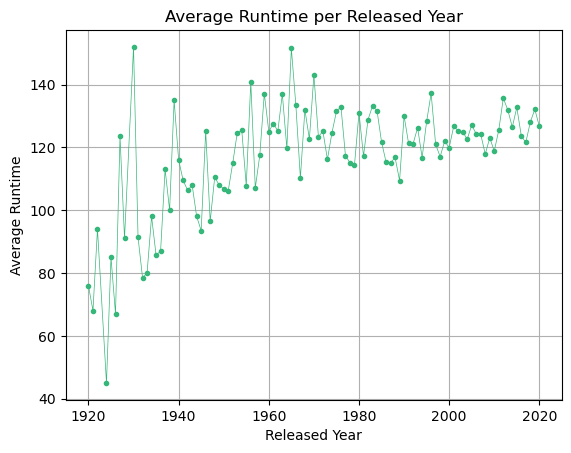

In [33]:
rgb_values = (0.20803, 0.718701, 0.472873)

plt.plot(average_runtime_year["Released_Year"], average_runtime_year["Runtime"], marker='.', linestyle='-', linewidth=0.5, color=rgb_values)
plt.xlabel("Released Year")
plt.ylabel("Average Runtime")
plt.title("Average Runtime per Released Year")
plt.grid(True)
plt.show()

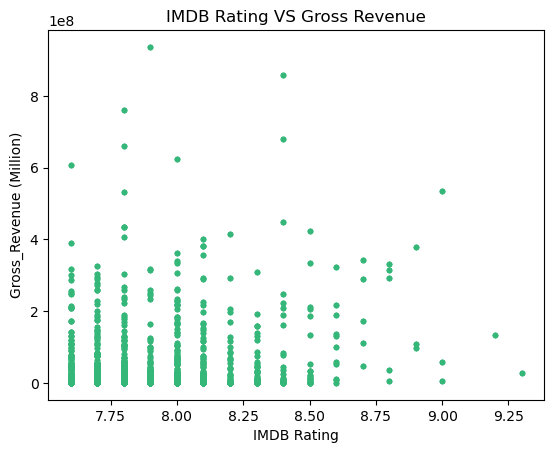

In [34]:
# How is the correlation between movie IMDB Rating and Gross Revenue affected by the movie's rating?

plt.scatter(df['IMDB_Rating'],df['Gross'], marker = '.', color=rgb_values)
plt.title("IMDB Rating VS Gross Revenue")
plt.xlabel('IMDB Rating')
plt.ylabel('Gross_Revenue (Million)')
plt.show()


In [36]:
# What are the top 5 directors, measured by the number of movies they have in the top 1000 films?
top_directors = df['Director'].value_counts().head(5).reset_index()
top_directors.columns = ['Director', 'Count']
top_directors

,Director,Count
0,Alfred Hitchcock,56
1,Steven Spielberg,52
2,Hayao Miyazaki,44
3,Martin Scorsese,40
4,Akira Kurosawa,40


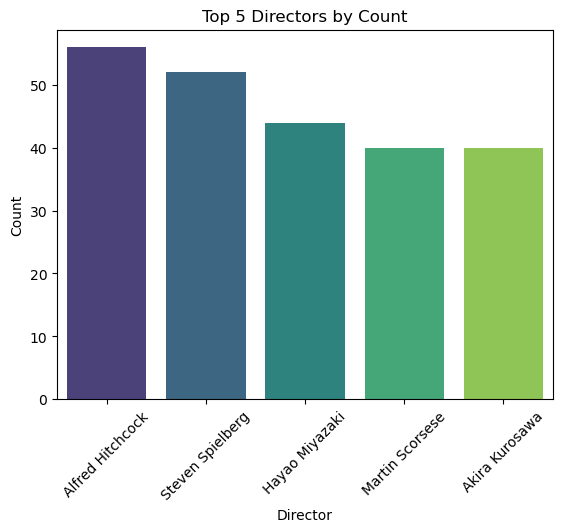

In [37]:
sns.barplot(x='Director', y='Count', data=top_directors, palette='viridis')
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 5 Directors by Count')
plt.xticks(rotation=45)
plt.show()

In [38]:
# How is the distribution of movies based on IMDb rating bins, considering that movies with a rating above 9 are in 'IMDb rating bin 9', those with a rating between 8 and 9 are in 'IMDb rating bin 8', and so on?

bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bin_labels = [i for i in range(10)]
df['Rating_Bin'] = pd.cut(df['IMDB_Rating'], bins=bin_edges, labels=bin_labels, right=False)
df['Rating_Bin'] = df['Rating_Bin'].astype(int)

bin_counts = df['Rating_Bin'].value_counts().sort_index()
bin_percentages = (bin_counts / len(df)) * 100
result_df = pd.DataFrame({'Bin': bin_counts.index, 'Count': bin_counts.values, 'Percentage': bin_percentages.values})
result_df

,Bin,Count,Percentage
0,7,2148,53.7
1,8,1832,45.8
2,9,20,0.5


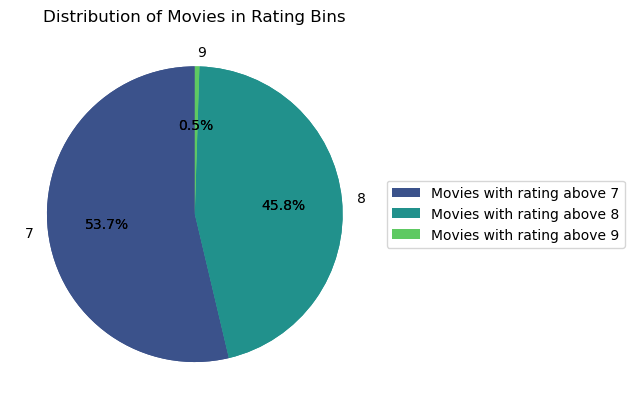

In [39]:
colors = sns.color_palette('viridis', len(result_df))
patches, texts, autotexts = plt.pie(result_df['Count'], autopct='%1.1f%%', startangle=90, colors=colors)

plt.pie(result_df['Count'], labels=result_df['Bin'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Movies in Rating Bins')
legend_labels = [f"Movies with rating above {bin_threshold}" for bin_threshold in result_df['Bin']]
plt.legend(patches, legend_labels, bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()